In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
import os


plt.rc("font", family="Malgun Gothic")

# 마이너스 폰트 깨지는 거
plt.rc("axes", unicode_minus = False)

In [7]:
# retina 설정해서 글씨 조금 선명하게
%config inlineBackend.figure_format = "retina"

## 1. 데이터 불러오기

In [13]:
df = pd.read_csv("도로교통공단_가해운전자 연령층별 월별 교통사고 통계_20191231.csv", encoding="cp949")
df.shape

(96, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   가해자연령층  96 non-null     object
 1   월       96 non-null     int64 
 2   사고건수    96 non-null     int64 
 3   사망자수    96 non-null     int64 
 4   중상자수    96 non-null     int64 
 5   경상자수    96 non-null     int64 
 6   부상신고자수  96 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.4+ KB


In [17]:
df.columns

Index(['가해자연령층', '월', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수'], dtype='object')

In [19]:
df.isnull().sum()

가해자연령층    0
월         0
사고건수      0
사망자수      0
중상자수      0
경상자수      0
부상신고자수    0
dtype: int64

## 2. 데이터 시각화

In [22]:
df

,가해자연령층,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,1,423,10,134,371,88
1,20세이하,2,405,6,128,397,81
2,20세이하,3,569,13,197,535,97
3,20세이하,4,595,11,175,578,117
4,20세이하,5,714,9,210,661,142
...,...,...,...,...,...,...,...
91,불명,8,318,0,44,234,91
92,불명,9,376,0,50,237,125
93,불명,10,391,0,65,277,90
94,불명,11,432,0,53,331,99


In [24]:
df.groupby(["월"]).mean()

,사고건수,사망자수,중상자수,경상자수,부상신고자수
월,,,,,
1,2069.000,37.000,685.875,2156.125,191.625
2,1844.000,25.375,596.500,2051.250,178.750
3,2266.625,31.500,725.750,2423.750,214.000
4,2388.000,35.750,778.000,2538.125,238.625
5,2597.375,38.125,821.625,2791.500,271.500
6,2371.000,34.875,757.125,2517.375,264.875
7,2404.250,30.125,735.625,2549.000,259.500
8,2499.000,31.625,772.750,2744.125,277.875
9,2416.375,35.875,739.625,2588.875,264.750


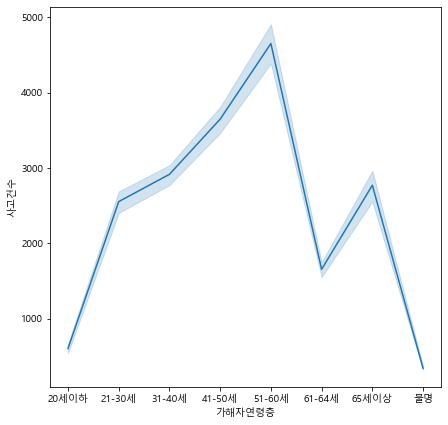

In [36]:
plt.figure(figsize=(7,7))
sns.lineplot(data=df, x="가해자연령층", y="사고건수", ci=95)

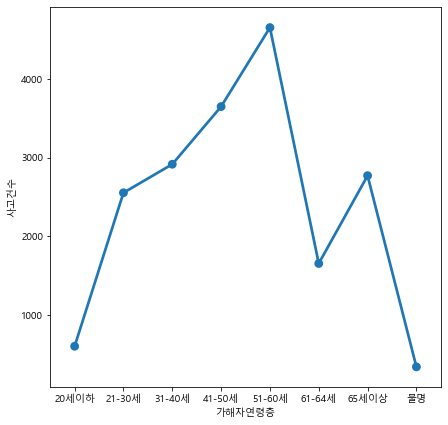

In [37]:
plt.figure(figsize=(7,7))
sns.pointplot(data=df, x="가해자연령층", y="사고건수", ci=None)

<Figure size 1224x576 with 0 Axes>

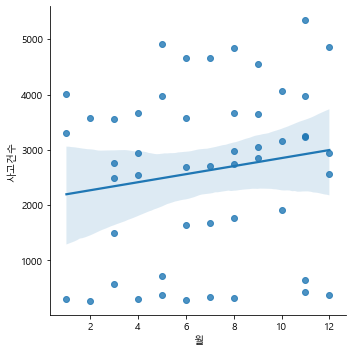

In [39]:
plt.figure(figsize=(17,8))
sns.lmplot(
    data=df.sample(50, random_state=1), 
    x="월", 
    y="사고건수"
)

In [40]:
cor_columns = ['가해자연령층', '월', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']

In [42]:
df_corr = df[cor_columns].corr()
df_corr

,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
월,1.000000,0.126915,0.091837,0.085314,0.120883,0.229488
사고건수,0.126915,1.000000,0.880318,0.995042,0.997659,0.957674
사망자수,0.091837,0.880318,1.000000,0.900504,0.860032,0.818521
중상자수,0.085314,0.995042,0.900504,1.000000,0.990921,0.942584
경상자수,0.120883,0.997659,0.860032,0.990921,1.000000,0.957206
부상신고자수,0.229488,0.957674,0.818521,0.942584,0.957206,1.000000
